<a href="https://colab.research.google.com/github/Shanthosh-Siv/Data-science/blob/main/Combustion_Instability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# 1. Generate synthetic dataset (500 samples)
np.random.seed(42)
temp = np.random.normal(1600, 100, 500)
press = np.random.normal(6.0, 0.5, 500)
burn = np.random.normal(0.5, 0.1, 500)


In [3]:
# 2. Risk label assignment function
def assign_risk(t, p, b):
    if t > 1700 or p > 6.5 or b < 0.3:
        return 2  # High risk
    elif t > 1600 or p > 6.0 or b < 0.4:
        return 1  # Medium risk
    else:
        return 0  # Low risk

In [4]:
# 3. Create DataFrame
labels = [assign_risk(t, p, b) for t, p, b in zip(temp, press, burn)]
df = pd.DataFrame({
    "Temperature": temp,
    "Pressure": press,
    "BurnRate": burn,
    "Label": labels
})

In [5]:
# 4. Train AI model
X = df[['Temperature', 'Pressure', 'BurnRate']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# 5. Take user input
temp_input = float(input("Enter Temperature (°C): "))
press_input = float(input("Enter Pressure (bar): "))
burn_input = float(input("Enter Burn Rate (ratio): "))

# 6. Predict risk
prediction = model.predict([[temp_input, press_input, burn_input]])[0]
risk_label = ["LOW RISK", "MEDIUM RISK", "HIGH RISK"]
print(f"⚠️ Predicted Status: {risk_label[prediction]}")


Enter Temperature (°C): 455
Enter Pressure (bar): 789
Enter Burn Rate (ratio): 0.25
⚠️ Predicted Status: HIGH RISK


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


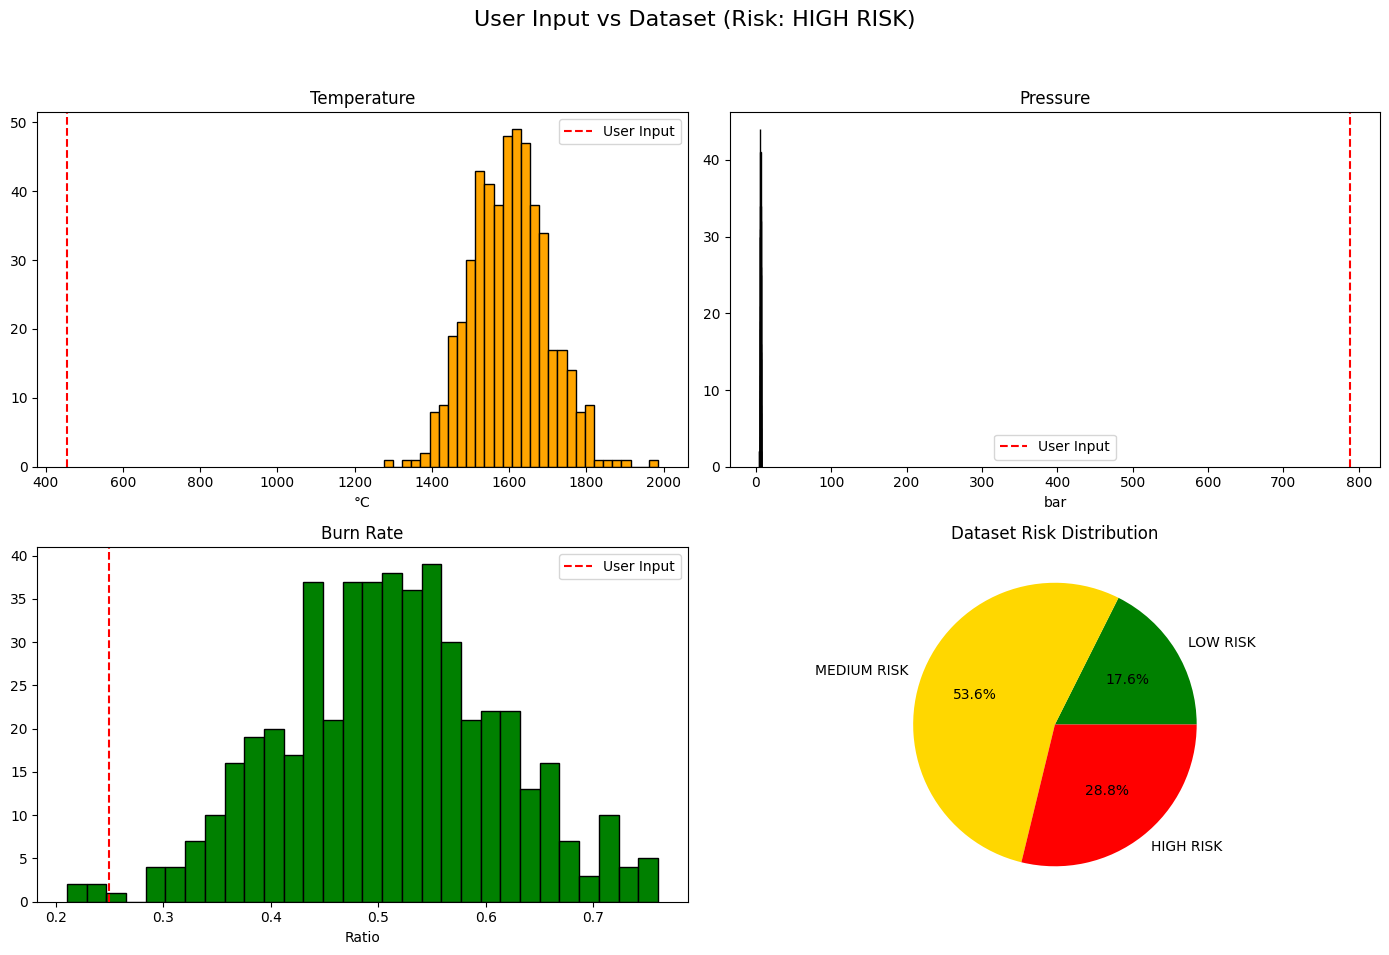

In [9]:
# 7. Dynamic visualizations
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f"User Input vs Dataset (Risk: {risk_label[prediction]})", fontsize=16)

# Temperature
axs[0, 0].hist(df["Temperature"], bins=30, color="orange", edgecolor="black")
axs[0, 0].axvline(temp_input, color="red", linestyle="--", label="User Input")
axs[0, 0].set_title("Temperature")
axs[0, 0].set_xlabel("°C")
axs[0, 0].legend()

# Pressure
axs[0, 1].hist(df["Pressure"], bins=30, color="skyblue", edgecolor="black")
axs[0, 1].axvline(press_input, color="red", linestyle="--", label="User Input")
axs[0, 1].set_title("Pressure")
axs[0, 1].set_xlabel("bar")
axs[0, 1].legend()

# Burn Rate
axs[1, 0].hist(df["BurnRate"], bins=30, color="green", edgecolor="black")
axs[1, 0].axvline(burn_input, color="red", linestyle="--", label="User Input")
axs[1, 0].set_title("Burn Rate")
axs[1, 0].set_xlabel("Ratio")
axs[1, 0].legend()

# Pie chart of risk distribution
risk_counts = df['Label'].value_counts().sort_index()
risk_names = [risk_label[i] for i in risk_counts.index]
axs[1, 1].pie(risk_counts, labels=risk_names, autopct='%1.1f%%', colors=["green", "gold", "red"])
axs[1, 1].set_title("Dataset Risk Distribution")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
